In [183]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn import metrics
from custom_functions import *

In [184]:
df_unsw_normal_test = pd.read_csv('cleaned_dataset/test/unsw_normal.csv')
df_bot_dos_test = pd.read_csv('cleaned_dataset/test/bot_iot_dos.csv')
df_bot_ddos_test = pd.read_csv('cleaned_dataset/test/bot_iot_ddos.csv')

In [185]:
test = pd.concat([df_unsw_normal_test, df_bot_dos_test,df_bot_ddos_test], ignore_index=True, sort=False)

In [186]:
x_test,y_test = data_preprocessing_test(test)

In [187]:
x_test = x_test[0]
y_test = y_test[0]

In [188]:
model = tf.keras.models.load_model('my_model')

In [189]:
predictions = model.predict(x_test)

In [190]:
y_pred = np.argmax(predictions, axis=-1)

accuracy:   1.000
Confusion matrix, without normalization


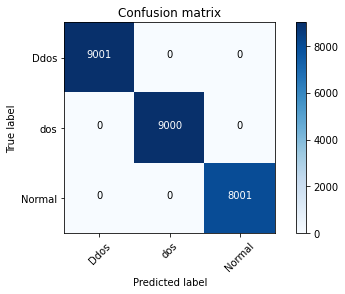

In [191]:
score = metrics.accuracy_score(y_pred,y_test)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_pred,y_test)
plot_confusion_matrix(cm, classes=['Ddos', 'dos','Normal'])